In [2]:
# %%
import ot
import numpy as np
import otmol as otm
from openbabel import pybel
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
# %matplotlib widget

In [3]:
def rmsd(V, W):
  """ Calculate Root-mean-square deviation from two sets of vectors V and W.
  """
  N = V.shape[0]
  return np.sqrt(np.sum((V-W)**2)/N)


In [4]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "./data_input/Mol-A.xyz"))
molB = next(pybel.readfile("xyz", "./data_input/Mol-B.xyz"))

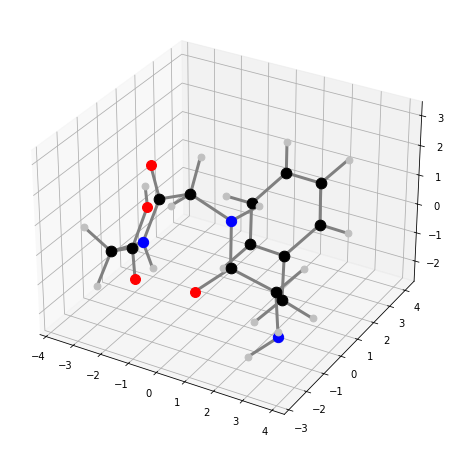

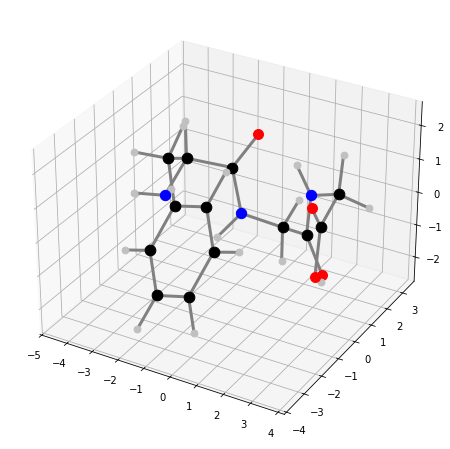

In [5]:
# %%
# Basic processing of the molecules
X_A, T_A, B_A = otm.tl.process_molecule(molA) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
X_B, T_B, B_B = otm.tl.process_molecule(molB)
otm.pl.plot_molecule(X_A, T_A, B_A, coloring = 'type', sizing = 'type')
otm.pl.plot_molecule(X_B, T_B, B_B, coloring = 'type', sizing = 'type')

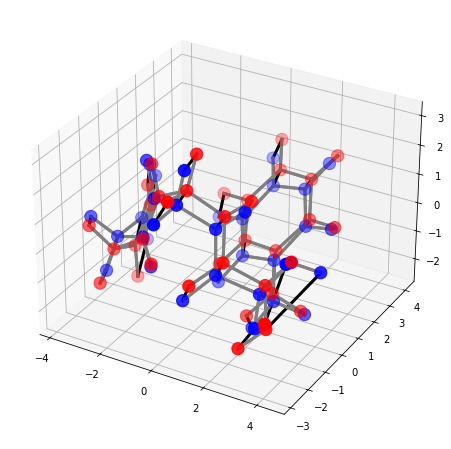

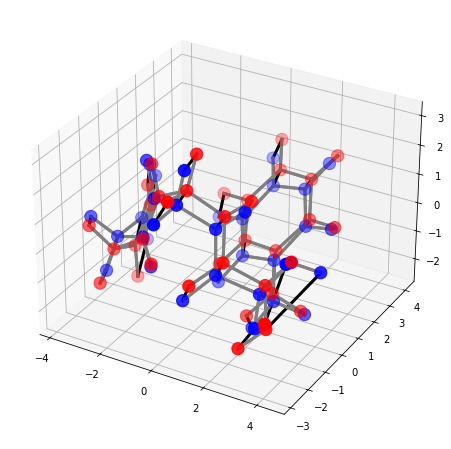

0.0


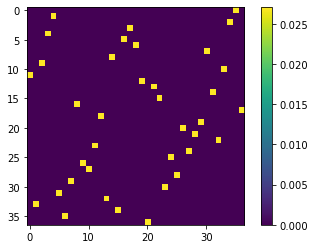

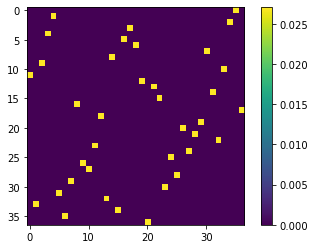

In [9]:
# %%
# Compute the distance matrices
C = otm.tl.molecule_physchem_distance(T_A, T_B)
D_A = otm.tl.geodesic_distance(X_A, B_A)
D_B = otm.tl.geodesic_distance(X_B, B_B)

# %%
# Fused Gromov-Wasserstein
DD_A = distance_matrix(X_A, X_A)
DD_B = distance_matrix(X_B, X_B)
P = otm.tl.molecule_optimal_transport(C, D_A+10*DD_A, D_B+10*DD_B, method='fgw', alpha=0.1)
X_B_aligned = otm.tl.molecule_alignment_allow_reflection(X_A, X_B, P) 
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, P, weight_cutoff=0.01)
plt.show()

P_ot = ot.emd(np.ones(37)/37, np.ones(37)/37, distance_matrix(X_A, X_B_aligned))
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, P_ot, weight_cutoff=0.0001)
plt.show()
print(np.abs(P - P_ot).max())
plt.imshow(P_ot)
plt.colorbar()
plt.show()
plt.imshow(P)
plt.colorbar()

In [11]:
# me
print(rmsd(X_A, X_B_aligned[np.argmax(P, axis=1)]))
print(rmsd(X_A, X_B_aligned))

0.7510346225053182
4.417606376929173


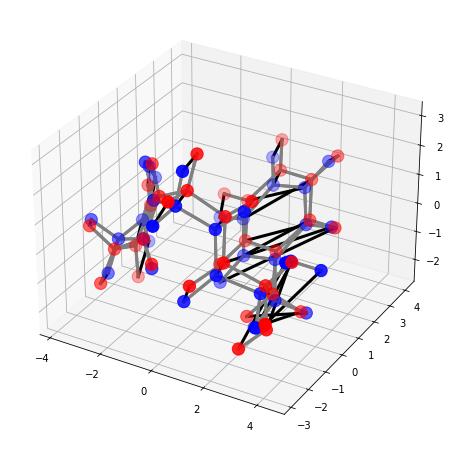

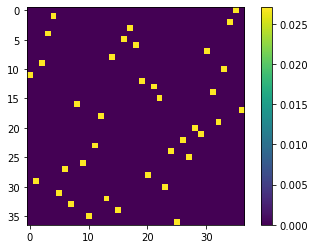

In [13]:
# %%
# Gromov-Wasserstein
P = otm.tl.molecule_optimal_transport(C, D_A, D_B, method='gw')
X_B_aligned = otm.tl.molecule_alignment_allow_reflection(X_A, X_B, P)
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, P)
plt.show()
plt.imshow(P)
plt.colorbar()


No more edges in the graph.


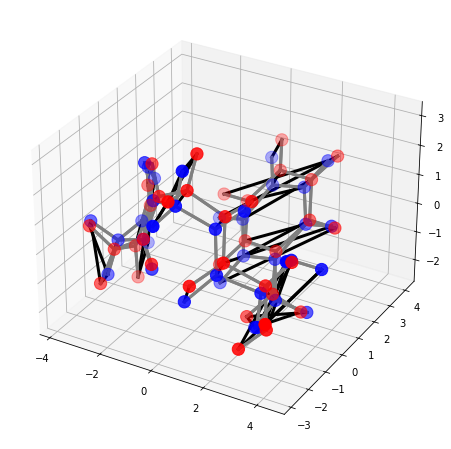

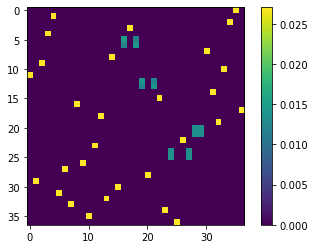

In [14]:
# %%
# Supervised Gromov-Wasserstein
P = otm.tl.molecule_optimal_transport(C, D_A, D_B, method='sgw', sgw_cutoff=5)
X_B_aligned = otm.tl.molecule_alignment_allow_reflection(X_A, X_B, P)
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, P)
plt.show()
plt.imshow(P)
plt.colorbar()


# of potential non-zeros in P: 210


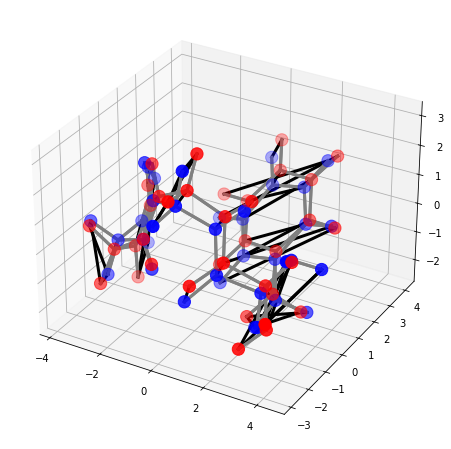

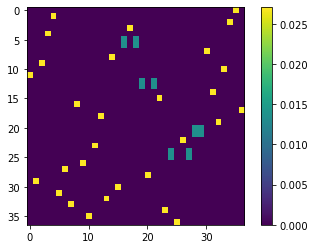

In [15]:
# %%
# Fused supervised Gromov-Wasserstein
P = otm.tl.molecule_optimal_transport(C, D_A, D_B, method='fsgw', sgw_cutoff=5, alpha=0.5)
X_B_aligned = otm.tl.molecule_alignment_allow_reflection(X_A, X_B, P)
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, P)
plt.show()
plt.imshow(P)
plt.colorbar()

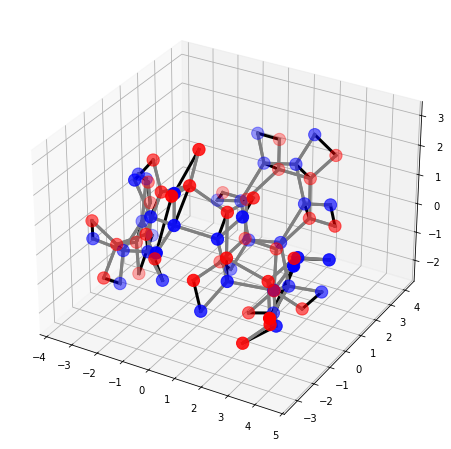

In [6]:
# %%
# ArbAlign results
molB_arbalign = next(pybel.readfile("xyz", "./data_input/Mol-B-aligned_to-Mol-A-ArbAlign.xyz"))
X_B_arbalign, T_B_arbalign, B_B_arbalign = otm.tl.process_molecule(molB_arbalign)
otm.pl.plot_alignment(X_A, X_B_arbalign, B_A, B_B_arbalign, np.identity(37))

In [7]:
rmsd(X_A, X_B_arbalign)

0.9879866231723826